# Evaluation

## IoU: Intersection over union  
<img src="./IoU.png"> 

In [1]:
def iou(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)
    union = (area_a + area_b - area_iou)

    return iou

In [2]:
def overlap(a, b):
    # get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
    # get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])
    
    # get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
    # get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
    # get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
    # get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

    # get width of IoU
    iou_w = iou_x2 - iou_x1
    # get height of IoU
    iou_h = iou_y2 - iou_y1

    # no overlap
    if iou_w < 0 or iou_h < 0:
        return 0.0
    
    # get area of IoU
    area_iou = iou_w * iou_h
    # get overlap ratio between IoU and all area
#     iou = area_iou / (area_a + area_b - area_iou)
#     union = (area_a + area_b - area_iou)

    return area_iou

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

In [4]:
GT = pd.read_csv('./Car2.csv',header=None)
# GT = GT[0].str.split('\t', expand = True)
# GT[0] = GT[0].astype(int)
# GT[1] = GT[1].astype(int)
# GT[2] = GT[2].astype(int)
# GT[3] = GT[3].astype(int)
GT.head()

,0,1,2,3
0,76,79,64,52
1,76,79,64,52
2,76,79,63,52
3,76,79,63,52
4,76,78,63,52


In [5]:
gt = pd.DataFrame()
gt['x1'] = GT[0]
gt['y1'] = GT[1]
gt['x2'] = GT[2] + GT[0]
gt['y2'] = GT[3] + GT[1]
gt.head()

,x1,y1,x2,y2
0,76,79,140,131
1,76,79,140,131
2,76,79,139,131
3,76,79,139,131
4,76,78,139,130


In [8]:
csrt = pd.read_csv('./results/csrt.csv')
kcf = pd.read_csv('./results/kcf.csv')
boosting = pd.read_csv('./results/boosting.csv')
mil = pd.read_csv('./results/MIL.csv')
tld = pd.read_csv('./results/TLD.csv')
mf = pd.read_csv('./results/medianflow.csv')

In [9]:
kcf.head()

,x1,y1,x2,y2
0,76,79,140,131
1,76,78,140,130
2,76,78,140,130
3,76,78,140,130
4,75,78,139,130


In [16]:
def evaluate(tracker):
    IOU = []
    OL=[]
    count = 0
    for i in range(913):
        A = np.array(tracker[i:i+1], dtype=np.float32)
        A = A[0]
        B = np.array(gt[i:i+1], dtype=np.float32)
        B = B[0]
        IoU = iou(A, B)
        ol = overlap(A, B)
        if ol == 0:
            count += 1
        
        IOU.append(IoU)
        OL.append(ol)
    
    return IOU,OL,count

In [17]:
miou = []
Rob = []

In [18]:
precision=[]
recall = []

### KCF Tracker

In [19]:
IoU_kcf = []
ol_kcf = []
count_kcf = 0
IoU_kcf,ol_kcf, count_kcf = evaluate(kcf)
time = [int(v) for v in range(913)]

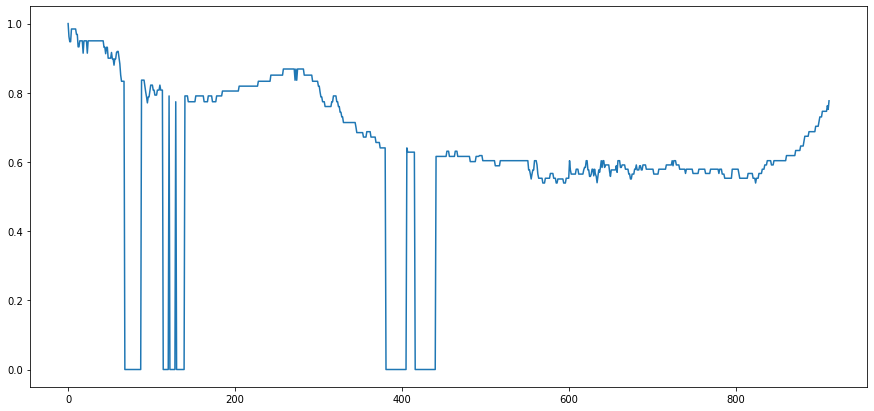

In [20]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_kcf)
plt.show()

Robustness：VOTで使用される評価指標。追従中に overlap が0になってしまったときを追従失敗とみなし、1つの動画シーケンスに対して何回追従失敗するか。

In [21]:
rob = count_kcf / len(gt)
Rob.append(rob)
print('Robustness：',rob)
mIoU = sum(IoU_kcf) / len(gt)
miou.append(mIoU)
print('mIoU:',mIoU)

Robustness： 0.10295728368017525
mIoU: 0.6155560482762599


In [22]:
kcf.shape

(913, 4)

In [23]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_kcf[i] > 0.5:
        TP.append(IoU_kcf[i])
    
    elif IoU_kcf[i] < 0.5:
        FP.append(IoU_kcf[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / ((len(gt))-count_kcf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.8970427163198248
Precision： 1.0


### CSRT Tracker

In [24]:
IoU_csrt = []
ol_csrt = []
count_csrt = 0
IoU_csrt, ol_csrt, count_csrt = evaluate(csrt)
time = [int(v) for v in range(913)]

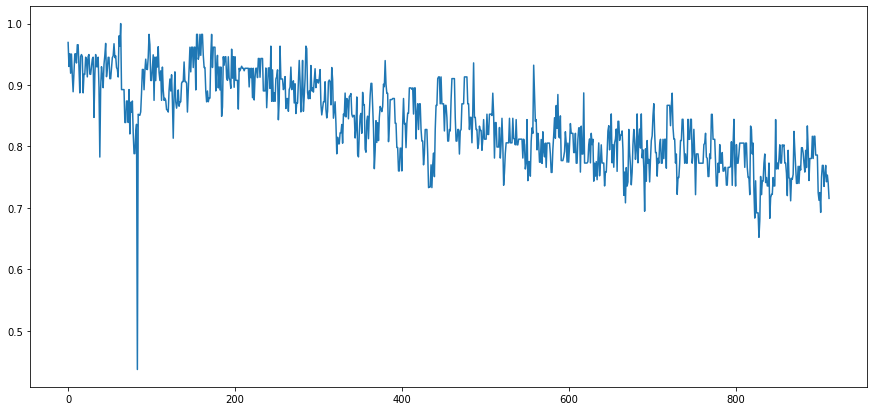

In [25]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_csrt)
plt.show()

In [26]:
rob = count_csrt / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_csrt) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.0
mIoU: 0.8411173210086593


In [27]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_csrt[i] > 0.5:
        TP.append(IoU_csrt[i])
    
    elif IoU_csrt[i] < 0.5:
        FP.append(IoU_csrt[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_csrt)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.9989047097480832
Precision： 0.9989047097480832


### Boosting Tracker

In [28]:
IoU_b = []
ol_b = []
count_b = 0
IoU_b,ol_b, count_b = evaluate(boosting)

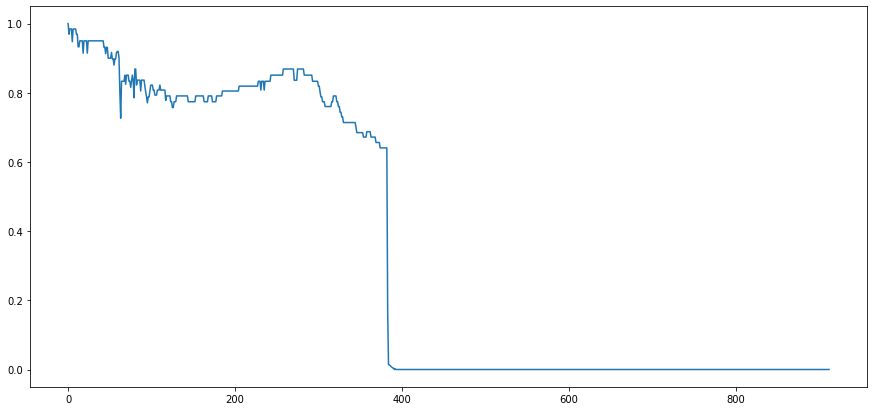

In [29]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_b)
plt.show()

In [30]:
rob = count_b / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_b) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.5706462212486308
mIoU: 0.34203326377583115


In [31]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_b[i] > 0.5:
        TP.append(IoU_b[i])
    
    elif IoU_b[i] < 0.5:
        FP.append(IoU_b[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_b)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.4194961664841183
Precision： 0.9770408163265306


### Median flow Tracker

In [32]:
IoU_mf = []
ol_mf = []
count_mf = 0
IoU_mf,ol_mf, count_mf = evaluate(mf)

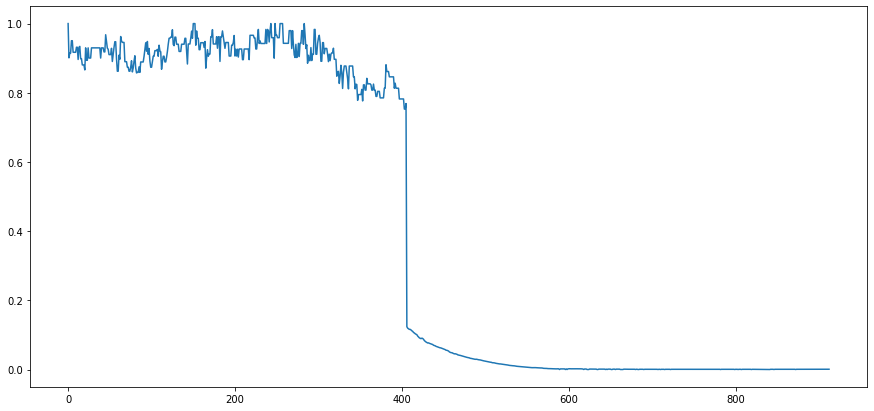

In [33]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mf)
plt.show()

In [34]:
rob = count_mf / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mf) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.03723986856516977
mIoU: 0.41088020246263507


In [35]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_mf[i] > 0.5:
        TP.append(IoU_mf[i])
    
    elif IoU_mf[i] < 0.5:
        FP.append(IoU_mf[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_mf)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.44468784227820374
Precision： 0.46188850967007966


### MIL Tracker

In [36]:
IoU_mil = []
ol_mil = []
count_mil = 0
IoU_mil,ol_mil, count_mil = evaluate(mil)

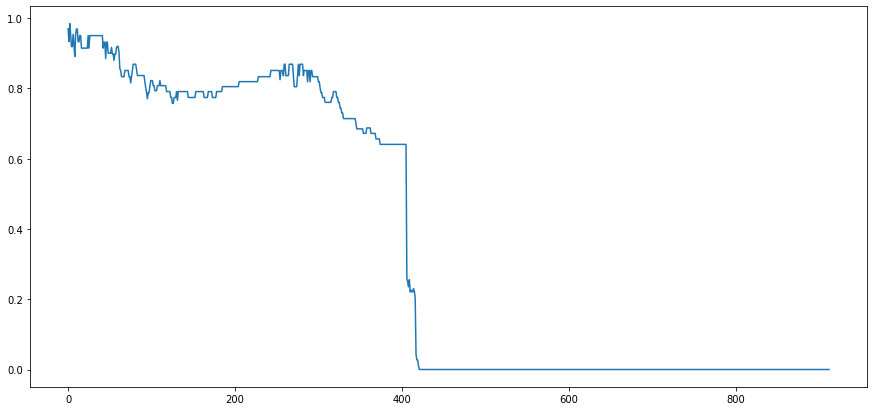

In [37]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_mil)
plt.show()

In [38]:
rob = count_mil / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_mil) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.5388828039430449
mIoU: 0.35994663759086765


In [39]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_mil[i] > 0.5:
        TP.append(IoU_mil[i])
    
    elif IoU_mil[i] < 0.5:
        FP.append(IoU_mil[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_mil)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.44468784227820374
Precision： 0.9643705463182898


### TLD Tracker 

In [40]:
IoU_tld = []
ol_tld = []
count_tld = 0
IoU_tld,ol_tld, count_tld = evaluate(tld)

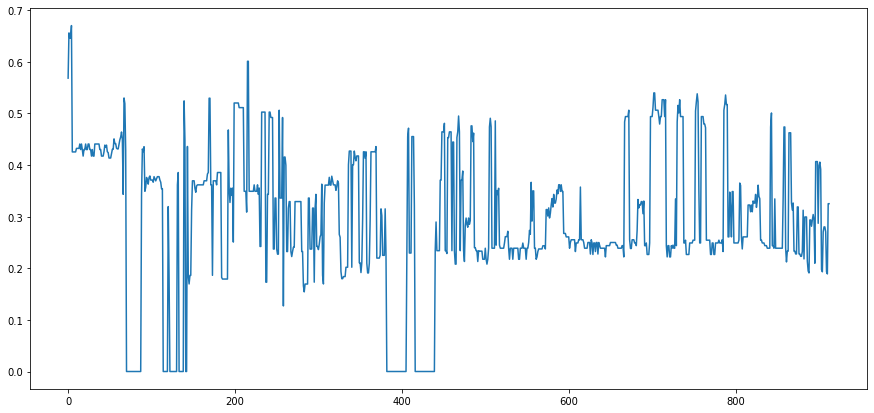

In [41]:
plt.figure(figsize=(15,7))
plt.plot(time, IoU_tld)
plt.show()

In [42]:
rob = count_tld / len(gt)
print('Robustness：',rob)
mIoU = sum(IoU_tld) / len(gt)
print('mIoU:',mIoU)
miou.append(mIoU)
Rob.append(rob)

Robustness： 0.09748083242059145
mIoU: 0.2938724624692806


In [43]:
TP = []
FP = []
for i in range(len(gt)):
    if IoU_tld[i] > 0.5:
        TP.append(IoU_tld[i])
    
    elif IoU_tld[i] < 0.5:
        FP.append(IoU_tld[i])     
        
Recall = len(TP) / (len(gt))
print('Recall：',Recall)
Precision = len(TP) / (len(gt)-count_tld)
print('Precision：', Precision)
recall.append(Recall)
precision.append(Precision)

Recall： 0.0624315443592552
Precision： 0.0691747572815534


## Result

In [44]:
tracker = ['kcf','csrt','boosting','medianflow','mil','tld']
result = pd.DataFrame()
result = result.assign(Tracker=tracker)
result = result.assign(Robustness = Rob)
result = result.assign(mIoU = miou)
result = result.assign(Recall = recall)
result = result.assign(Precision= precision)
result = result[['Tracker','mIoU', 'Robustness','Recall','Precision']]
result

,Tracker,mIoU,Robustness,Recall,Precision
0,kcf,0.615556,0.102957,0.897043,1.000000
1,csrt,0.841117,0.000000,0.998905,0.998905
2,boosting,0.342033,0.570646,0.419496,0.977041
3,medianflow,0.410880,0.037240,0.444688,0.461889
4,mil,0.359947,0.538883,0.444688,0.964371
5,tld,0.293872,0.097481,0.062432,0.069175
